In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head(3)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100


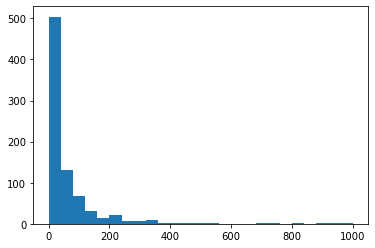

In [3]:
# This time focus on weight (units in kg)
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);

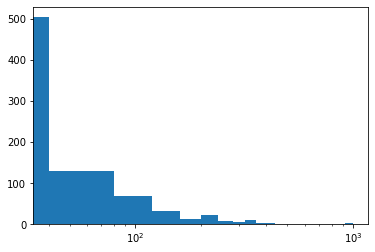

In [4]:
# This time instead of limiting xaxis, use log scaling
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log')

# As we see, the resulting plot doesn't look that 
# informative either. Need to adjust the x-axis

In [5]:
# Look at the max and min of the weights
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [6]:
# Then try to see the log of these values
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

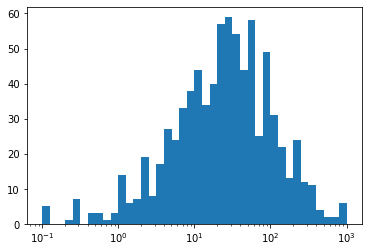

In [7]:
# In log base 10, min is -1 and max is 3.
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log');

# The result is better, but the x-axis could have
# been better. Hardcode the ticks.

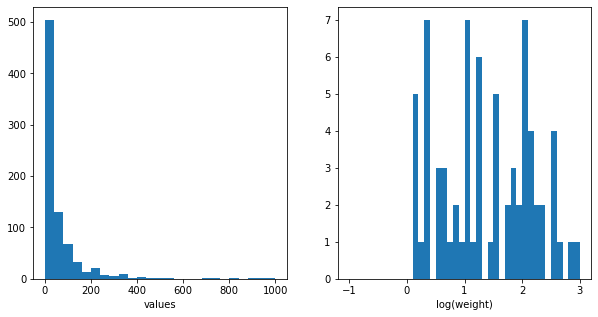

In [14]:
# Plot side by side
plt.figure(figsize = [10, 5])

# Natural units
plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xlabel('values');

# Log transformation
plt.subplot(1, 2, 2)
# Get the min and max value of log for use in bins
min_log = np.log10(pokemon['weight'].min())
max_log = np.log10(pokemon['weight'].max())
log_bins = np.arange(min_log, max_log + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = log_bins)
plt.xlabel('log(weight)');



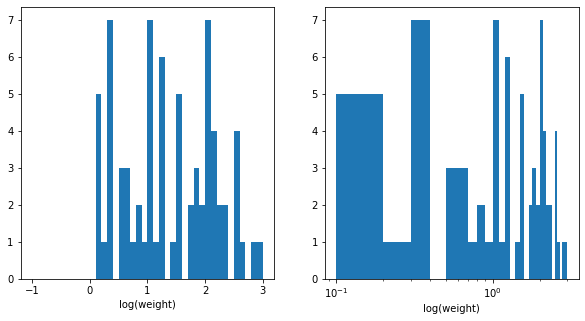

In [15]:
# Plot side by side
plt.figure(figsize = [10, 5])

# Log transformation 1
plt.subplot(1, 2, 1)
min_log = np.log10(pokemon['weight'].min())
max_log = np.log10(pokemon['weight'].max())
log_bins = np.arange(min_log, max_log + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = log_bins)
plt.xlabel('log(weight)');

# Log transformation 2 (with xscale)
plt.subplot(1, 2, 2)
log_bins = np.arange(min_log, max_log + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = log_bins)
plt.xscale('log')
plt.xlabel('log(weight)');

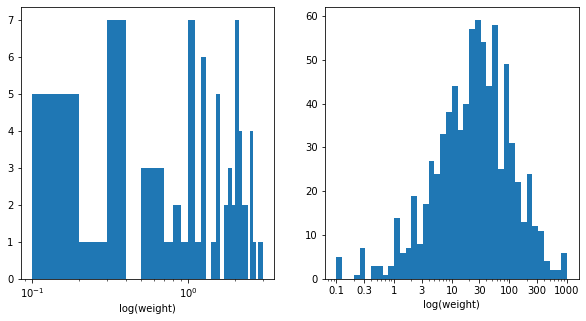

In [22]:
# Plot side by side
plt.figure(figsize = [10, 5])

# Log transformation 2
plt.subplot(1, 2, 1)
min_log = np.log10(pokemon['weight'].min())
max_log = np.log10(pokemon['weight'].max())
log_bins = np.arange(min_log, max_log + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = log_bins)
plt.xscale('log')
plt.xlabel('log(weight)');

# Log transformation 3 (adjust bin edges so they are
# evenly-spaced powers of 10)
plt.subplot(1, 2, 2)
log_bins_10 = 10 **np.arange(min_log, max_log + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = log_bins_10)
plt.xscale('log')
tick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('log(weight)');